### $\;\;\;\;\;\;\;$Computerized Detection of Multiple Sclerosis with Artificial Intelligence and DTI Scans

<b>$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Matthew Biniam 2020-05-17</b>

## More Information

The following notebook only contains code snippets and back-end information of the following research paper. <i><b>For more information refer to the README.</b></i>

## Dependencies

<i>This proposal uses Tensorflow as a backend and Sklearn, numpy, pandas and matplotlib as dependencies. All rights to both modify and access the following libraries have been granted by the Google Brain Team on 2018-05-03.</i>

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd   
from tensorflow import keras
from PIL import Image
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML
from sklearn import preprocessing
%matplotlib inline 


## Data Overview

<i>Within the following study the Diffuse Tensor Images of 210000 patients across North America were obtained and analyzed. From the collected DTI images, the Fractionally Antrisopy<b>(FA)</b> and Mean Diffusivity<b>(MD)</b>  in the cerebellum, corpus callosum genu, corpus callosum splenium, corpus callosum body and hypothalamus were collected. This section consists of a clear breakdown of the data. Unauthorized use of the following data is forbidden and access to use this data in the following research study has been granted.</i>

<br><b>Data Input</b>

In [2]:
#Reading MS Data
#Data consists of patients which tested positive for MS and patients which tested negative for MS(Healthy Patients)
df = pd.read_csv("MultipleSclerosisData.csv")
dataset=df.values
#Early Data Examination
df.head(210000)

,Age,Gender,BMI,FA Cerebellum AL,FA CC(Genu) AL,FA CC(Splenium) AL,FA CC(Body) AL,FA Hypothalamus AL,FA Cerebellum UL,FA CC(Genu) UL,...,MD CC(Splenium) AL,MD CC(Body) AL,MD Hypothalamus AL,MD Cerebellum UL,MD CC(Genu) UL,MD CC(Splenium) UL,MD CC(Body) UL,MD Hypothalamus UL,EDSS SCALE,MS_Status
0,21,0,24.24,0.709,0.704,0.700,0.701,0.703,0.683,0.650,...,0.373,0.379,0.374,0.417,0.411,0.388,0.391,0.376,6,1
1,19,1,26.98,0.701,0.719,0.711,0.705,0.711,0.670,0.674,...,0.377,0.373,0.379,0.393,0.429,0.446,0.395,0.416,6,1
2,26,1,24.86,0.706,0.710,0.714,0.707,0.701,0.705,0.664,...,0.375,0.374,0.373,0.442,0.392,0.450,0.423,0.425,5,1
3,25,1,26.54,0.710,0.706,0.715,0.709,0.708,0.683,0.643,...,0.370,0.377,0.371,0.409,0.447,0.386,0.449,0.432,6,1
4,25,0,25.02,0.716,0.715,0.706,0.712,0.714,0.646,0.700,...,0.370,0.379,0.374,0.433,0.373,0.429,0.421,0.420,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,47,0,24.18,0.774,0.798,0.793,0.777,0.781,0.774,0.798,...,0.328,0.316,0.322,0.301,0.317,0.328,0.316,0.322,0,0
209996,51,1,24.66,0.767,0.774,0.761,0.757,0.752,0.767,0.774,...,0.324,0.305,0.330,0.322,0.312,0.324,0.305,0.330,1,0
209997,48,1,23.94,0.781,0.786,0.756,0.783,0.787,0.781,0.786,...,0.300,0.345,0.339,0.307,0.301,0.300,0.345,0.339,0,0
209998,50,1,18.84,0.753,0.765,0.757,0.759,0.799,0.753,0.765,...,0.341,0.312,0.330,0.337,0.306,0.341,0.312,0.330,0,0


<br><b>Independent Factors</b>

In [3]:
#24 Indepndent Factors were used in this study to help determine MS diagnosis 
independent_factors=list(df.head(0))[0:24]
for independent_factor in independent_factors:
    print(independent_factor)

Age
Gender
BMI
FA Cerebellum AL
FA CC(Genu) AL
FA CC(Splenium) AL
FA CC(Body) AL
FA Hypothalamus AL
FA Cerebellum UL
FA CC(Genu) UL
FA CC(Splenium) UL
FA CC(Body) UL
FA Hypothalamus UL
MD Cerebellum AL
MD CC(Genu) AL
MD CC(Splenium) AL
MD CC(Body) AL
MD Hypothalamus AL
MD Cerebellum UL
MD CC(Genu) UL
MD CC(Splenium) UL
MD CC(Body) UL
MD Hypothalamus UL
EDSS SCALE


<br><b>Male to Female Comparisson</b>

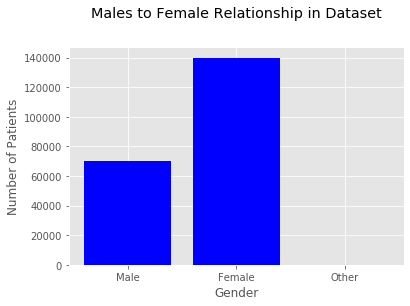

In [4]:
#Number of Males and Females within the Dataset
#1 indicates Female
#0 indicates Male
plt.style.use('ggplot')
gender=list(df.Gender)
num_males=0
num_females=0
for i in gender:
    if i==1:
        num_females+=1
    else:
        num_males+=1

x1 = ['Male', 'Female','Other']
y1 = [num_males, num_females, 0]

x_pos = [i for i, _ in enumerate(x1)]

plt.bar(x_pos, y1, color='blue')
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

plt.title("Males to Female Relationship in Dataset", pad=30)


plt.xticks(x_pos, x1)

plt.show()


<br><b>Age Cohorts</b>

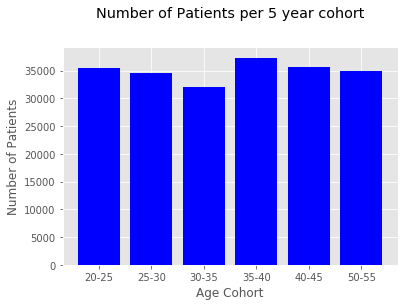

20-25 cohort: 35444
25-30 cohort: 34540
30-35 cohort: 32100
35-40 cohort: 37327
40-45 cohort: 35662
45-50 cohort: 34927


In [5]:
#Bar graph representing equal 5 year cohort breakdown of all the patients
#Patients which tested positive or negative for MS are included in the following data representation
age=list(df.Age)
age20_25=0
age25_30=0
age30_35=0
age35_40=0
age40_45=0
age45_50=0
for i in age:
    if 19<=i<=25:
        age20_25+=1
    elif 25<=i<=30:
        age25_30+=1
    elif 30<=i<=35:
        age30_35+=1
    elif 35<=i<=40:
        age35_40+=1
    elif 40<=i<=45:
        age40_45+=1
    else:
        age45_50+=1
        
        
x3 = ['20-25', '25-30', '30-35','35-40','40-45','50-55']
y3 = [age20_25, age25_30, age30_35, age35_40, age40_45, age45_50]

x_pos = [i for i, _ in enumerate(x3)]

plt.bar(x_pos, y3, color='blue')
plt.xlabel("Age Cohort")
plt.ylabel("Number of Patients")
plt.title("Number of Patients per 5 year cohort", pad=30)
plt.xticks(x_pos, x3)

plt.show()
print("20-25 cohort: "+str(age20_25))
print("25-30 cohort: "+str(age25_30))
print("30-35 cohort: "+str(age30_35))
print("35-40 cohort: "+str(age35_40))
print("40-45 cohort: "+str(age40_45))
print("45-50 cohort: "+str(age45_50))


<br><b>Males and Females per Age Cohort</b>

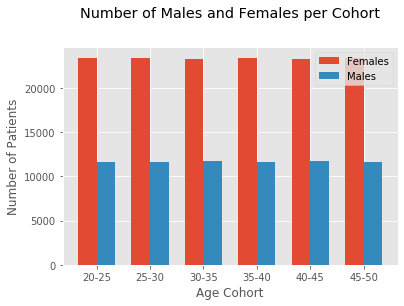

In [6]:
age20_25=[0,0]
age25_30=[0,0]
age30_35=[0,0]
age35_40=[0,0]
age40_45=[0,0]
age45_50=[0,0]
for i in range(35000):
    if(gender[i]==0):
        age20_25[0]+=1
    else:
        age20_25[1]+=1

for i in range(35000, 70000):
    if(gender[i]==0):
        age25_30[0]+=1
    else:
        age25_30[1]+=1

for i in range(70000, 105000):
    if(gender[i]==0):
        age30_35[0]+=1
    else:
        age30_35[1]+=1
            
for i in range(105000, 140000):
    if(gender[i]==0):
        age35_40[0]+=1
    else:
        age35_40[1]+=1      
            
for i in range(140000,175000):
    if(gender[i]==0):
        age40_45[0]+=1
    else:
        age40_45[1]+=1
                 
for i in range(175000, 210000):
    if(gender[i]==0):
        age45_50[0]+=1
    else:
        age45_50[1]+=1



N = 6
women_means = (age20_25[0], age25_30[0], age30_35[0], age35_40[0], age40_45[0], age45_50[0])
men_means = (age20_25[1], age25_30[1], age30_35[1], age35_40[1], age40_45[1], age45_50[1])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Females')
plt.bar(ind + width, women_means, width, label='Males')

plt.ylabel('Number of Patients')
plt.xlabel('Age Cohort')
plt.title('Number of Males and Females per Cohort', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

<br><b>Dependent Factors</b>

In [85]:
#Positivity or Negativity for Multiple Sclerosis is the dependent factor analyzed in this study 
dependent_factor=list(df.head(0))[24]
print(dependent_factor)

MS_Status


<br><b>MS State</b>

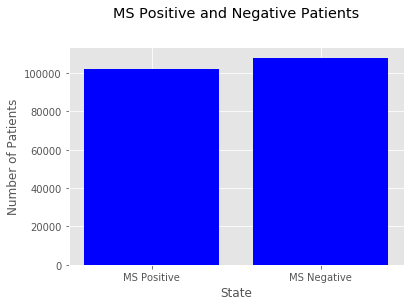

In [8]:
MS_STATUS=list(df.MS_Status)
pos_ms=0
neg_ms=0
for test in MS_STATUS:
    if test==1:
        pos_ms+=1
    else:
        neg_ms+=1

x4 = ['MS Positive', 'MS Negative']
y4 = [pos_ms, neg_ms]

x_pos = [i for i, _ in enumerate(x4)]

plt.bar(x_pos, y4, color='blue')
plt.xlabel("State")
plt.ylabel("Number of Patients")

plt.title("MS Positive and Negative Patients", pad=30)


plt.xticks(x_pos, x4)

plt.show()


<i>Number of Patients tested Positive for Multiple Sclerosis within 210,000 Dataset: 102,000</i><br><i>Number of Patients tested Negative for Multiple Sclerosis within 210,000 Dataset: 108,000
</i>

<br><b>MS State Against Gender</b>

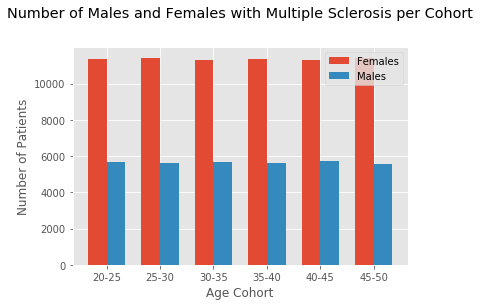

In [86]:
#Only Patients that tested positive for MS are included in the following data representation

age20_25=[0,0]
age25_30=[0,0]
age30_35=[0,0]
age35_40=[0,0]
age40_45=[0,0]
age45_50=[0,0]
for i in range(17000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age20_25[0]+=1
        else:
            age20_25[1]+=1

for i in range(35000, 52000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age25_30[0]+=1
        else:
            age25_30[1]+=1

for i in range(70000, 87000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age30_35[0]+=1
        else:
            age30_35[1]+=1
            
for i in range(105000, 122000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age35_40[0]+=1
        else:
            age35_40[1]+=1         
            
for i in range(140000,157000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age40_45[0]+=1
        else:
            age40_45[1]+=1
                 
for i in range(175000, 192000):
    if(MS_STATUS[i]==1):
        if(gender[i]==1):
            age45_50[0]+=1
        else:
            age45_50[1]+=1


N = 6
women_means = (age20_25[0], age25_30[0], age30_35[0], age35_40[0], age40_45[0], age45_50[0])
men_means = (age20_25[1], age25_30[1], age30_35[1], age35_40[1], age40_45[1], age45_50[1])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, women_means, width, label='Females')
plt.bar(ind + width, men_means, width, label='Males')

plt.ylabel('Number of Patients')
plt.xlabel('Age Cohort')
plt.title('Number of Males and Females with Multiple Sclerosis per Cohort', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

<i>An equal number of patients which tested positive for MS were selected from the original dataset and were used in this paper to optimize accuracy for each cohort in the Artificial Intelligence Model. 11,000(±200) female MS patient and 6000(±200) male MS patients were included for each cohert in the final dataset. </i>

<br><b>Summary</b>

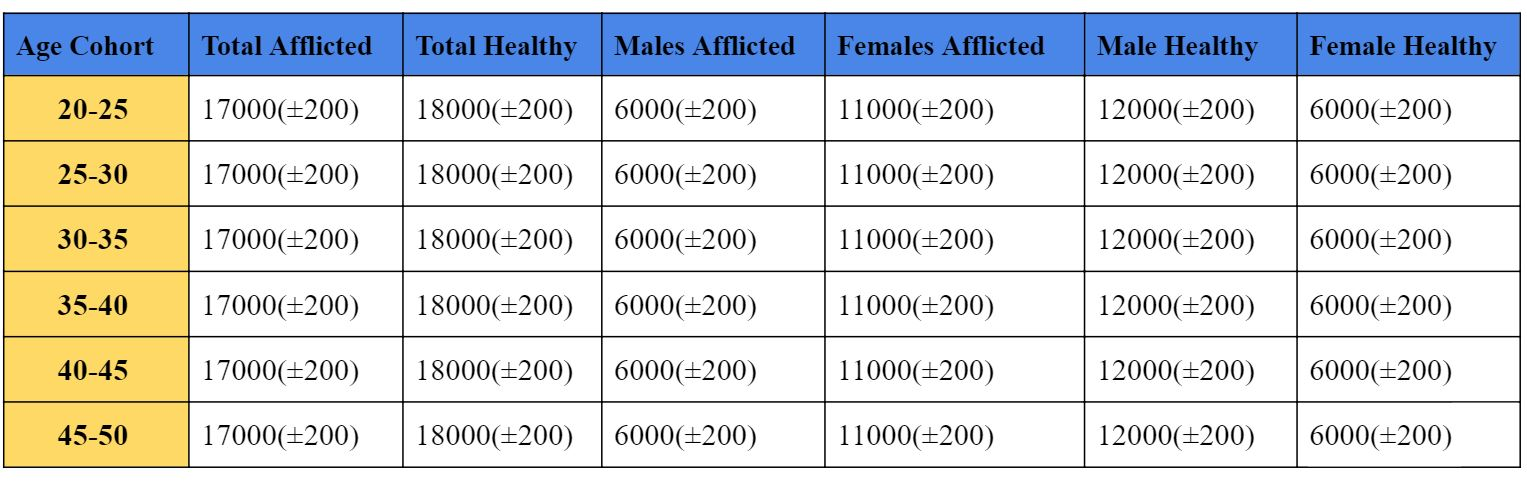

In [10]:
#Summary Chart of data breakdown
Image(filename='summary.jpg') 

<i>Above is an informative summary about the breakdown of the data in regards to both gender and age within this study.</i><br>

## Experimental Data

<i>Diffuse Tensor Imaging works based on the diffusion of water molecules that move on the myelin sheath which surrounds the axons. It should be expected a healthy human adult’s diffuse tensor image orientation is complete, and an adult human with multiple sclerosis be incomplete. This section examines the two measurements extracted from these scans, Mean Diffusivity<b>(MD)</b> and Fractional Anisotropy<b>(FA)</b>. </i>
 <i>In spite of there being an option to create a CNN with the various DTI scans, this study opted for a Feed Forward Neural network. This decision was made primarily due to the low accuracy DTI CNN’s possesed in past research studies. A CNN was attempted within this study, however due to confidential reasons, the brain scans of the patients within this study are not permitted to be presented.  This study extracted Mean Diffusivity and Fractional Anisotropy from the DTI scans to help determine the MS status of a patient. These numerical values were obtained in areas of the brain which have high axonal integerty to maximize the accuracy of the results when building ANN.</i>

<br><b>DTI Scans</b>

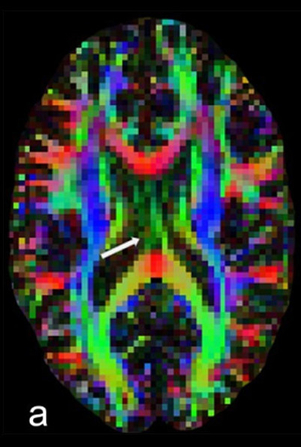

In [11]:
#Health Paitent(Flip angle 20)
size = 128, 128
Image(filename='healthypatient.jpg')

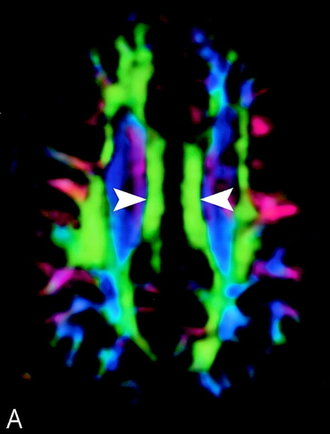

In [12]:
#MS Patient(Flip angle 30)
#Incomplete Structure
size = 128, 128
Image(filename='mspatient.jpg')

<br><br><b>Numerical Results from DTI Scans</b>

In [13]:
#Data examined within this section(+BMI AND EDSS)
experimental_data=list(df.head(0))[3:23]
for experimental_factor in experimental_data:
    print(experimental_factor)

FA Cerebellum AL
FA CC(Genu) AL
FA CC(Splenium) AL
FA CC(Body) AL
FA Hypothalamus AL
FA Cerebellum UL
FA CC(Genu) UL
FA CC(Splenium) UL
FA CC(Body) UL
FA Hypothalamus UL
MD Cerebellum AL
MD CC(Genu) AL
MD CC(Splenium) AL
MD CC(Body) AL
MD Hypothalamus AL
MD Cerebellum UL
MD CC(Genu) UL
MD CC(Splenium) UL
MD CC(Body) UL
MD Hypothalamus UL


<b>Mean Diffusivity</b>

<i>Compactness and Degree of Myelination</i>

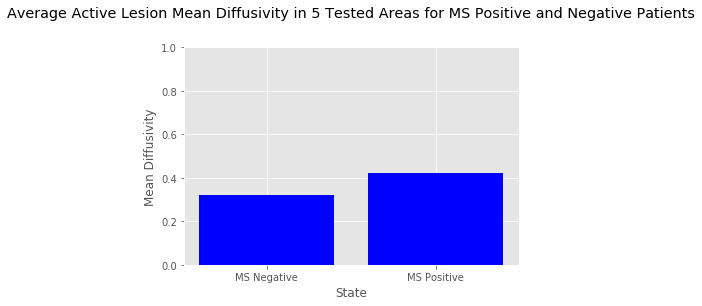

In [87]:
#Comparisson in Mean Diffusivity of patients which tested positive for MS against patients which tested negative
#Measurments in this data representation are from active lesions(More Recent Damage)
MS_AVG_POSITIVE=0
MS_AVG_NEGATIVE=0
#MS Positive
MS_AVG_POSITIVE+=sum(dataset[0:16999])[13]+sum(dataset[0:16999])[14]+sum(dataset[0:16999])[15]+sum(dataset[0:16999])[16]+sum(dataset[0:16999])[17]
MS_AVG_POSITIVE+=sum(dataset[34999:51999])[13]+sum(dataset[34999:51999])[14]+sum(dataset[34999:51999])[15]+sum(dataset[34999:51999])[16]+sum(dataset[34999:51999])[17]
MS_AVG_POSITIVE+=sum(dataset[69999:86999])[13]+sum(dataset[69999:86999])[14]+sum(dataset[69999:86999])[15]+sum(dataset[69999:86999])[16]+sum(dataset[69999:86999])[17]
MS_AVG_POSITIVE+=sum(dataset[104999:121999])[13]+sum(dataset[104999:121999])[14]+sum(dataset[104999:121999])[15]+sum(dataset[104999:121999])[16]+sum(dataset[104999:121999])[17]
MS_AVG_POSITIVE+=sum(dataset[139999:156999])[13]+sum(dataset[139999:156999])[14]+sum(dataset[139999:156999])[15]+sum(dataset[139999:156999])[16]+sum(dataset[139999:156999])[17]
MS_AVG_POSITIVE+=sum(dataset[174999:191999])[13]+sum(dataset[174999:191999])[14]+sum(dataset[174999:191999])[15]+sum(dataset[174999:191999])[16]+sum(dataset[174999:191999])[17]
MS_AVG_POSITIVE/=510000

#MS Negative
MS_AVG_NEGATIVE+=sum(dataset[16999:34999])[13]+sum(dataset[16999:34999])[14]+sum(dataset[16999:34999])[15]+sum(dataset[16999:34999])[16]+sum(dataset[16999:34999])[17]
MS_AVG_NEGATIVE+=sum(dataset[51999:69999])[13]+sum(dataset[51999:69999])[14]+sum(dataset[51999:69999])[15]+sum(dataset[51999:69999])[16]+sum(dataset[51999:69999])[17]
MS_AVG_NEGATIVE+=sum(dataset[86999:104999])[13]+sum(dataset[86999:104999])[14]+sum(dataset[86999:104999])[15]+sum(dataset[86999:104999])[16]+sum(dataset[86999:104999])[17]
MS_AVG_NEGATIVE+=sum(dataset[121999:139000])[13]+sum(dataset[121999:139000])[14]+sum(dataset[121999:139000])[15]+sum(dataset[121999:139000])[16]+sum(dataset[121999:139000])[17]
MS_AVG_NEGATIVE+=sum(dataset[156999:174999])[13]+sum(dataset[156999:174999])[14]+sum(dataset[156999:174999])[15]+sum(dataset[156999:174999])[16]+sum(dataset[156999:174999])[17]
MS_AVG_NEGATIVE+=sum(dataset[191999:209999])[13]+sum(dataset[191999:209999])[14]+sum(dataset[191999:209999])[15]+sum(dataset[191999:209999])[16]+sum(dataset[191999:209999])[17]
MS_AVG_NEGATIVE/=540000


x1 = ['MS Negative', 'MS Positive', ]
y1 = [MS_AVG_NEGATIVE, MS_AVG_POSITIVE]

x_pos = [i for i, _ in enumerate(x1)]
#FA is measured between 0 - 1
plt.ylim(0, 1)
plt.bar(x_pos, y1, color='blue')
plt.xlabel("State")
plt.ylabel("Mean Diffusivity")

plt.title("Average Active Lesion Mean Diffusivity in 5 Tested Areas for MS Positive and Negative Patients", pad=30)


plt.xticks(x_pos, x1)

plt.show()

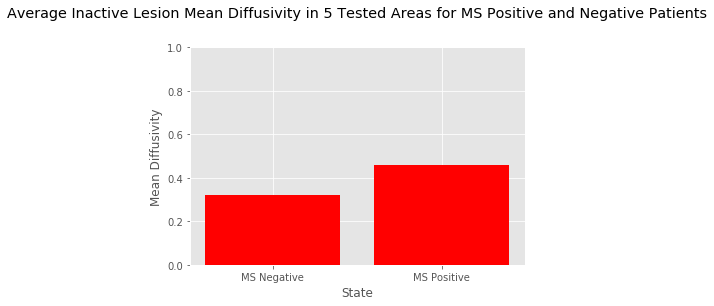

In [89]:
#Comparisson in Mean Diffusivity of patients which tested positive for MS against patients which tested negative
#Measurments in this data representation are from active lesions(More Recent Damage)
MS_AVG_POSITIVE=0
MS_AVG_NEGATIVE=0
#MS Positive
MS_AVG_POSITIVE+=sum(dataset[0:16999])[18]+sum(dataset[0:16999])[19]+sum(dataset[0:16999])[20]+sum(dataset[0:16999])[21]+sum(dataset[0:16999])[22]
MS_AVG_POSITIVE+=sum(dataset[34999:51999])[18]+sum(dataset[34999:51999])[19]+sum(dataset[34999:51999])[20]+sum(dataset[34999:51999])[21]+sum(dataset[34999:51999])[22]
MS_AVG_POSITIVE+=sum(dataset[69999:86999])[18]+sum(dataset[69999:86999])[19]+sum(dataset[69999:86999])[20]+sum(dataset[69999:86999])[21]+sum(dataset[69999:86999])[22]
MS_AVG_POSITIVE+=sum(dataset[104999:121999])[18]+sum(dataset[104999:121999])[19]+sum(dataset[104999:121999])[20]+sum(dataset[104999:121999])[21]+sum(dataset[104999:121999])[22]
MS_AVG_POSITIVE+=sum(dataset[139999:156999])[18]+sum(dataset[139999:156999])[19]+sum(dataset[139999:156999])[20]+sum(dataset[139999:156999])[21]+sum(dataset[139999:156999])[22]
MS_AVG_POSITIVE+=sum(dataset[174999:191999])[18]+sum(dataset[174999:191999])[19]+sum(dataset[174999:191999])[20]+sum(dataset[174999:191999])[21]+sum(dataset[174999:191999])[22]
MS_AVG_POSITIVE/=510000

#MS Negative
MS_AVG_NEGATIVE+=sum(dataset[16999:34999])[13]+sum(dataset[16999:34999])[14]+sum(dataset[16999:34999])[15]+sum(dataset[16999:34999])[16]+sum(dataset[16999:34999])[17]
MS_AVG_NEGATIVE+=sum(dataset[51999:69999])[13]+sum(dataset[51999:69999])[14]+sum(dataset[51999:69999])[15]+sum(dataset[51999:69999])[16]+sum(dataset[51999:69999])[17]
MS_AVG_NEGATIVE+=sum(dataset[86999:104999])[13]+sum(dataset[86999:104999])[14]+sum(dataset[86999:104999])[15]+sum(dataset[86999:104999])[16]+sum(dataset[86999:104999])[17]
MS_AVG_NEGATIVE+=sum(dataset[121999:139000])[13]+sum(dataset[121999:139000])[14]+sum(dataset[121999:139000])[15]+sum(dataset[121999:139000])[16]+sum(dataset[121999:139000])[17]
MS_AVG_NEGATIVE+=sum(dataset[156999:174999])[13]+sum(dataset[156999:174999])[14]+sum(dataset[156999:174999])[15]+sum(dataset[156999:174999])[16]+sum(dataset[156999:174999])[17]
MS_AVG_NEGATIVE+=sum(dataset[191999:209999])[13]+sum(dataset[191999:209999])[14]+sum(dataset[191999:209999])[15]+sum(dataset[191999:209999])[16]+sum(dataset[191999:209999])[17]
MS_AVG_NEGATIVE/=540000


x1 = ['MS Negative', 'MS Positive', ]
y1 = [MS_AVG_NEGATIVE, MS_AVG_POSITIVE]

x_pos = [i for i, _ in enumerate(x1)]
#MD normalized in data to be between 0 - 1
plt.ylim(0, 1)
plt.bar(x_pos, y1, color='red')
plt.xlabel("State")
plt.ylabel("Mean Diffusivity")

plt.title("Average Inactive Lesion Mean Diffusivity in 5 Tested Areas for MS Positive and Negative Patients", pad=30)


plt.xticks(x_pos, x1)

plt.show()

<i>A comparisson between the two graphs above displays patients with MS had a Higher MD in unactive lesions when compared to Active Lestions. This is primarly due to the longevity of axonal damage that unactive lesions experience relative to active lesions. </i>

<b>Mean Diffusivity in Age Cohorts</b>

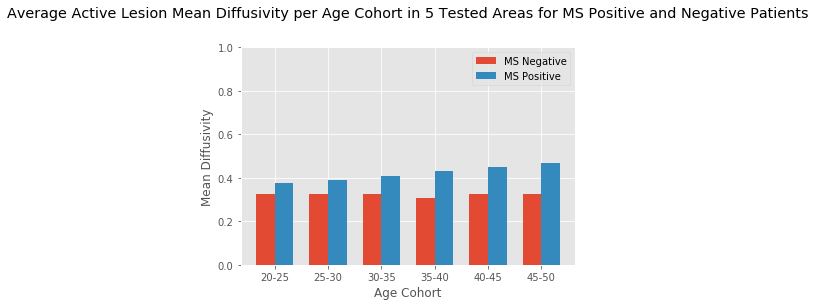

In [90]:
age20_25=[]
age25_30=[]
age30_35=[]
age35_40=[]
age40_45=[]
age45_50=[]
#MS Positive
age20_25.append(sum(dataset[0:16999])[13]+sum(dataset[0:16999])[14]+sum(dataset[0:16999])[15]+sum(dataset[0:16999])[16]+sum(dataset[0:16999])[17])
age25_30.append(sum(dataset[34999:51999])[13]+sum(dataset[34999:51999])[14]+sum(dataset[34999:51999])[15]+sum(dataset[34999:51999])[16]+sum(dataset[34999:51999])[17])
age30_35.append(sum(dataset[69999:86999])[13]+sum(dataset[69999:86999])[14]+sum(dataset[69999:86999])[15]+sum(dataset[69999:86999])[16]+sum(dataset[69999:86999])[17])
age35_40.append(sum(dataset[104999:121999])[13]+sum(dataset[104999:121999])[14]+sum(dataset[104999:121999])[15]+sum(dataset[104999:121999])[16]+sum(dataset[104999:121999])[17])
age40_45.append(sum(dataset[139999:156999])[13]+sum(dataset[139999:156999])[14]+sum(dataset[139999:156999])[15]+sum(dataset[139999:156999])[16]+sum(dataset[139999:156999])[17])
age45_50.append(sum(dataset[174999:191999])[13]+sum(dataset[174999:191999])[14]+sum(dataset[174999:191999])[15]+sum(dataset[174999:191999])[16]+sum(dataset[174999:191999])[17])


#MS Negative
age20_25.append(sum(dataset[16999:34999])[13]+sum(dataset[16999:34999])[14]+sum(dataset[16999:34999])[15]+sum(dataset[16999:34999])[16]+sum(dataset[16999:34999])[17])
age25_30.append(sum(dataset[51999:69999])[13]+sum(dataset[51999:69999])[14]+sum(dataset[51999:69999])[15]+sum(dataset[51999:69999])[16]+sum(dataset[51999:69999])[17])
age30_35.append(sum(dataset[86999:104999])[13]+sum(dataset[86999:104999])[14]+sum(dataset[86999:104999])[15]+sum(dataset[86999:104999])[16]+sum(dataset[86999:104999])[17])
age35_40.append(sum(dataset[121999:139000])[13]+sum(dataset[121999:139000])[14]+sum(dataset[121999:139000])[15]+sum(dataset[121999:139000])[16]+sum(dataset[121999:139000])[17])
age40_45.append(sum(dataset[156999:174999])[13]+sum(dataset[156999:174999])[14]+sum(dataset[156999:174999])[15]+sum(dataset[156999:174999])[16]+sum(dataset[156999:174999])[17])
age45_50.append(sum(dataset[191999:209999])[13]+sum(dataset[191999:209999])[14]+sum(dataset[191999:209999])[15]+sum(dataset[191999:209999])[16]+sum(dataset[191999:209999])[17])

N = 6
ms_pos = (age20_25[0]/85000, age25_30[0]/85000, age30_35[0]/85000, age35_40[0]/85000, age40_45[0]/85000, age45_50[0]/85000)
men_neg = (age20_25[1]/90000, age25_30[1]/90000, age30_35[1]/90000, age35_40[1]/90000, age40_45[1]/90000, age45_50[1]/90000)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Mean Diffusivity')
plt.xlabel('Age Cohort')
plt.title('Average Active Lesion Mean Diffusivity per Age Cohort in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

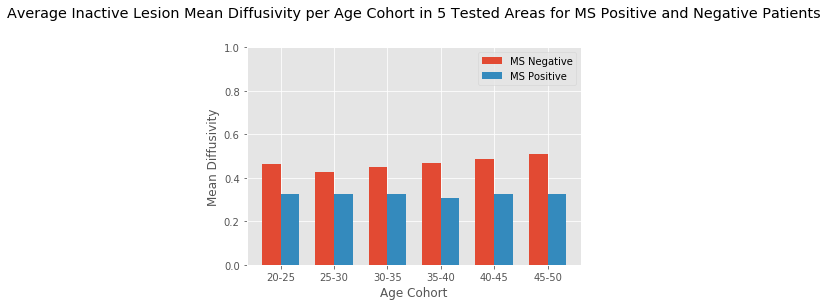

In [92]:
age20_25=[]
age25_30=[]
age30_35=[]
age35_40=[]
age40_45=[]
age45_50=[]
#MS Positive
age20_25.append(sum(dataset[0:16999])[18]+sum(dataset[0:16999])[19]+sum(dataset[0:16999])[20]+sum(dataset[0:16999])[16]+sum(dataset[0:16999])[7])
age25_30.append(sum(dataset[34999:51999])[18]+sum(dataset[34999:51999])[19]+sum(dataset[34999:51999])[20]+sum(dataset[34999:51999])[21]+sum(dataset[34999:51999])[22])
age30_35.append(sum(dataset[69999:86999])[18]+sum(dataset[69999:86999])[19]+sum(dataset[69999:86999])[20]+sum(dataset[69999:86999])[21]+sum(dataset[69999:86999])[22])
age35_40.append(sum(dataset[104999:121999])[18]+sum(dataset[104999:121999])[19]+sum(dataset[104999:121999])[20]+sum(dataset[104999:121999])[21]+sum(dataset[104999:121999])[22])
age40_45.append(sum(dataset[139999:156999])[18]+sum(dataset[139999:156999])[19]+sum(dataset[139999:156999])[20]+sum(dataset[139999:156999])[21]+sum(dataset[139999:156999])[22])
age45_50.append(sum(dataset[174999:191999])[18]+sum(dataset[174999:191999])[19]+sum(dataset[174999:191999])[20]+sum(dataset[174999:191999])[21]+sum(dataset[174999:191999])[22])


#MS Negative
age20_25.append(sum(dataset[16999:34999])[13]+sum(dataset[16999:34999])[14]+sum(dataset[16999:34999])[15]+sum(dataset[16999:34999])[16]+sum(dataset[16999:34999])[17])
age25_30.append(sum(dataset[51999:69999])[13]+sum(dataset[51999:69999])[14]+sum(dataset[51999:69999])[15]+sum(dataset[51999:69999])[16]+sum(dataset[51999:69999])[17])
age30_35.append(sum(dataset[86999:104999])[13]+sum(dataset[86999:104999])[14]+sum(dataset[86999:104999])[15]+sum(dataset[86999:104999])[16]+sum(dataset[86999:104999])[17])
age35_40.append(sum(dataset[121999:139000])[13]+sum(dataset[121999:139000])[14]+sum(dataset[121999:139000])[15]+sum(dataset[121999:139000])[16]+sum(dataset[121999:139000])[17])
age40_45.append(sum(dataset[156999:174999])[13]+sum(dataset[156999:174999])[14]+sum(dataset[156999:174999])[15]+sum(dataset[156999:174999])[16]+sum(dataset[156999:174999])[17])
age45_50.append(sum(dataset[191999:209999])[13]+sum(dataset[191999:209999])[14]+sum(dataset[191999:209999])[15]+sum(dataset[191999:209999])[16]+sum(dataset[191999:209999])[17])

N = 6
ms_neg = (age20_25[0]/85000, age25_30[0]/85000, age30_35[0]/85000, age35_40[0]/85000, age40_45[0]/85000, age45_50[0]/85000)
ms_pos = (age20_25[1]/90000, age25_30[1]/90000, age30_35[1]/90000, age35_40[1]/90000, age40_45[1]/90000, age45_50[1]/90000)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Mean Diffusivity')
plt.xlabel('Age Cohort')
plt.title('Average Inactive Lesion Mean Diffusivity per Age Cohort in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

<b>Mean Diffusivity 5 Areas</b>

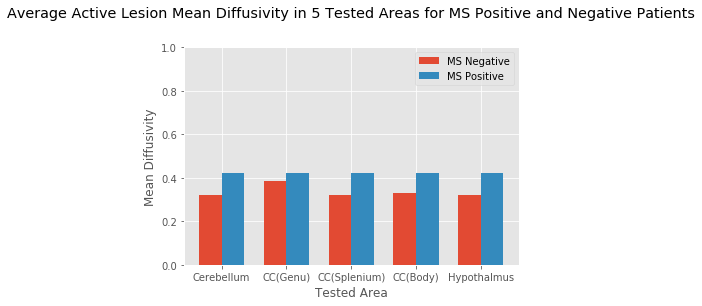

In [93]:
Cerebellum=[]
CC_Genu=[]
CC_Splenium=[]
CC_Body=[]
Hypothalamus=[]

Cerebellum.append((sum(dataset[0:16999])[13]+sum(dataset[34999:51999])[13]+sum(dataset[69999:86999])[13]+sum(dataset[104999:121999])[13]+sum(dataset[139999:156999])[13]+sum(dataset[174999:191999])[13])/102000)
CC_Genu.append((sum(dataset[0:16999])[14]+sum(dataset[34999:51999])[14]+sum(dataset[69999:86999])[14]+sum(dataset[104999:121999])[14]+sum(dataset[139999:156999])[14]+sum(dataset[174999:191999])[14])/102000)
CC_Splenium.append((sum(dataset[0:16999])[15]+sum(dataset[34999:51999])[15]+sum(dataset[69999:86999])[15]+sum(dataset[104999:121999])[15]+sum(dataset[139999:156999])[15]+sum(dataset[174999:191999])[15])/102000)
CC_Body.append((sum(dataset[0:16999])[16]+sum(dataset[34999:51999])[16]+sum(dataset[69999:86999])[16]+sum(dataset[104999:121999])[16]+sum(dataset[139999:156999])[16]+sum(dataset[174999:191999])[16])/102000)
Hypothalamus.append((sum(dataset[0:16999])[17]+sum(dataset[34999:51999])[17]+sum(dataset[69999:86999])[17]+sum(dataset[104999:121999])[17]+sum(dataset[139999:156999])[17]+sum(dataset[174999:191999])[17])/102000)




Cerebellum.append((sum(dataset[16999:34999])[13]+sum(dataset[51999:69999])[13]+sum(dataset[86999:104999])[13]+sum(dataset[121999:139000])[13]+sum(dataset[156999:174999])[13]+sum(dataset[191999:209999])[13])/108000)
CC_Genu.append((sum(dataset[16999:34999])[14]+sum(dataset[51999:69999])[14]+sum(dataset[86999:104999])[14]+sum(dataset[121999:139000])[14]+sum(dataset[156999:174999])[14]+sum(dataset[191999:209999])[14])/90000)
CC_Splenium.append((sum(dataset[16999:34999])[15]+sum(dataset[51999:69999])[15]+sum(dataset[86999:104999])[15]+sum(dataset[121999:139000])[15]+sum(dataset[156999:174999])[15]+sum(dataset[191999:209999])[15])/108000)
CC_Body.append((sum(dataset[16999:34999])[16]+sum(dataset[51999:69999])[16]+sum(dataset[86999:104999])[16]+sum(dataset[121999:139000])[16]+sum(dataset[156999:174999])[16]+sum(dataset[191999:209999])[16])/106000)
Hypothalamus.append((sum(dataset[16999:34999])[17]+sum(dataset[51999:69999])[17]+sum(dataset[86999:104999])[17]+sum(dataset[121999:139000])[17]+sum(dataset[156999:174999])[17]+sum(dataset[191999:209999])[17])/108000)


N = 5
ms_pos = (Cerebellum[0], CC_Genu[0], CC_Splenium[0], CC_Body[0], Hypothalamus[0])
ms_neg = (Cerebellum[1], CC_Genu[1], CC_Splenium[1], CC_Body[1], Hypothalamus[1])
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Mean Diffusivity')
plt.xlabel('Tested Area')
plt.title('Average Active Lesion Mean Diffusivity in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('Cerebellum', 'CC(Genu)', 'CC(Splenium)', 'CC(Body)', 'Hypothalmus'))
plt.legend(loc='best')
plt.show()

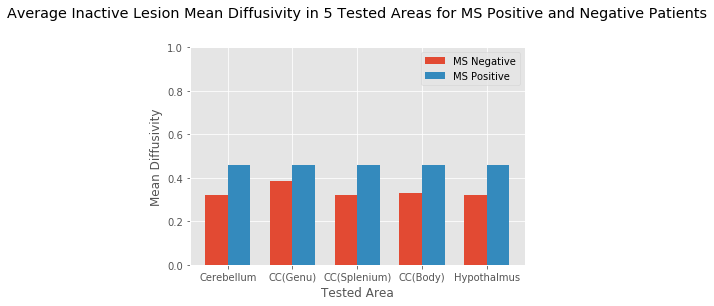

In [95]:
Cerebellum=[]
CC_Genu=[]
CC_Splenium=[]
CC_Body=[]
Hypothalamus=[]

Cerebellum.append((sum(dataset[0:16999])[18]+sum(dataset[34999:51999])[18]+sum(dataset[69999:86999])[18]+sum(dataset[104999:121999])[18]+sum(dataset[139999:156999])[18]+sum(dataset[174999:191999])[18])/102000)
CC_Genu.append((sum(dataset[0:16999])[19]+sum(dataset[34999:51999])[19]+sum(dataset[69999:86999])[19]+sum(dataset[104999:121999])[19]+sum(dataset[139999:156999])[19]+sum(dataset[174999:191999])[19])/102000)
CC_Splenium.append((sum(dataset[0:16999])[20]+sum(dataset[34999:51999])[20]+sum(dataset[69999:86999])[20]+sum(dataset[104999:121999])[20]+sum(dataset[139999:156999])[20]+sum(dataset[174999:191999])[20])/102000)
CC_Body.append((sum(dataset[0:16999])[21]+sum(dataset[34999:51999])[21]+sum(dataset[69999:86999])[21]+sum(dataset[104999:121999])[21]+sum(dataset[139999:156999])[21]+sum(dataset[174999:191999])[21])/102000)
Hypothalamus.append((sum(dataset[0:16999])[22]+sum(dataset[34999:51999])[22]+sum(dataset[69999:86999])[22]+sum(dataset[104999:121999])[22]+sum(dataset[139999:156999])[22]+sum(dataset[174999:191999])[22])/102000)




Cerebellum.append((sum(dataset[16999:34999])[13]+sum(dataset[51999:69999])[13]+sum(dataset[86999:104999])[13]+sum(dataset[121999:139000])[13]+sum(dataset[156999:174999])[13]+sum(dataset[191999:209999])[13])/108000)
CC_Genu.append((sum(dataset[16999:34999])[14]+sum(dataset[51999:69999])[14]+sum(dataset[86999:104999])[14]+sum(dataset[121999:139000])[14]+sum(dataset[156999:174999])[14]+sum(dataset[191999:209999])[14])/90000)
CC_Splenium.append((sum(dataset[16999:34999])[15]+sum(dataset[51999:69999])[15]+sum(dataset[86999:104999])[15]+sum(dataset[121999:139000])[15]+sum(dataset[156999:174999])[15]+sum(dataset[191999:209999])[15])/108000)
CC_Body.append((sum(dataset[16999:34999])[16]+sum(dataset[51999:69999])[16]+sum(dataset[86999:104999])[16]+sum(dataset[121999:139000])[16]+sum(dataset[156999:174999])[16]+sum(dataset[191999:209999])[16])/106000)
Hypothalamus.append((sum(dataset[16999:34999])[17]+sum(dataset[51999:69999])[17]+sum(dataset[86999:104999])[17]+sum(dataset[121999:139000])[17]+sum(dataset[156999:174999])[17]+sum(dataset[191999:209999])[17])/108000)


N = 5
ms_pos = (Cerebellum[0], CC_Genu[0], CC_Splenium[0], CC_Body[0], Hypothalamus[0])
ms_neg = (Cerebellum[1], CC_Genu[1], CC_Splenium[1], CC_Body[1], Hypothalamus[1])
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Mean Diffusivity')
plt.xlabel('Tested Area')
plt.title('Average Inactive Lesion Mean Diffusivity in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('Cerebellum', 'CC(Genu)', 'CC(Splenium)', 'CC(Body)', 'Hypothalmus'))
plt.legend(loc='best')
plt.show()

<b>Fractional Anisotropy</b>

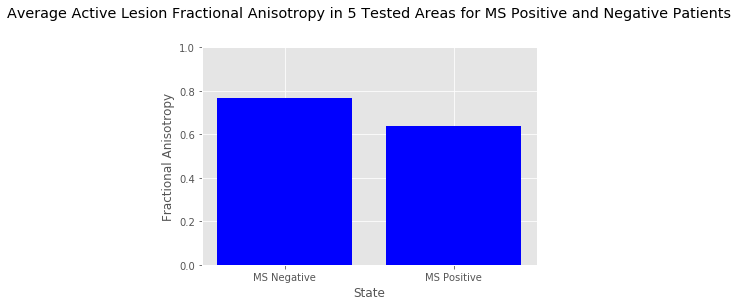

In [96]:
#Comparisson in Fractional Anisotropy of patients which tested positive for MS against patients which tested negative
#Measurments in this data representation are from active lesions(More Recent Damage)
MS_AVG_POSITIVE=0
MS_AVG_NEGATIVE=0
#MS Positive
MS_AVG_POSITIVE+=sum(dataset[0:16999])[13]+sum(dataset[0:16999])[4]+sum(dataset[0:16999])[5]+sum(dataset[0:16999])[6]+sum(dataset[0:16999])[7]
MS_AVG_POSITIVE+=sum(dataset[34999:51999])[3]+sum(dataset[34999:51999])[4]+sum(dataset[34999:51999])[5]+sum(dataset[34999:51999])[6]+sum(dataset[34999:51999])[7]
MS_AVG_POSITIVE+=sum(dataset[69999:86999])[3]+sum(dataset[69999:86999])[4]+sum(dataset[69999:86999])[5]+sum(dataset[69999:86999])[6]+sum(dataset[69999:86999])[7]
MS_AVG_POSITIVE+=sum(dataset[104999:121999])[3]+sum(dataset[104999:121999])[4]+sum(dataset[104999:121999])[5]+sum(dataset[104999:121999])[6]+sum(dataset[104999:121999])[7]
MS_AVG_POSITIVE+=sum(dataset[139999:156999])[3]+sum(dataset[139999:156999])[4]+sum(dataset[139999:156999])[5]+sum(dataset[139999:156999])[6]+sum(dataset[139999:156999])[7]
MS_AVG_POSITIVE+=sum(dataset[174999:191999])[3]+sum(dataset[174999:191999])[4]+sum(dataset[174999:191999])[5]+sum(dataset[174999:191999])[6]+sum(dataset[174999:191999])[7]
MS_AVG_POSITIVE/=510000

#MS Negative
MS_AVG_NEGATIVE+=sum(dataset[16999:34999])[3]+sum(dataset[16999:34999])[4]+sum(dataset[16999:34999])[5]+sum(dataset[16999:34999])[6]+sum(dataset[16999:34999])[7]
MS_AVG_NEGATIVE+=sum(dataset[51999:69999])[3]+sum(dataset[51999:69999])[4]+sum(dataset[51999:69999])[5]+sum(dataset[51999:69999])[6]+sum(dataset[51999:69999])[7]
MS_AVG_NEGATIVE+=sum(dataset[86999:104999])[3]+sum(dataset[86999:104999])[4]+sum(dataset[86999:104999])[5]+sum(dataset[86999:104999])[6]+sum(dataset[86999:104999])[7]
MS_AVG_NEGATIVE+=sum(dataset[121999:139000])[3]+sum(dataset[121999:139000])[4]+sum(dataset[121999:139000])[5]+sum(dataset[121999:139000])[6]+sum(dataset[121999:139000])[7]
MS_AVG_NEGATIVE+=sum(dataset[156999:174999])[3]+sum(dataset[156999:174999])[4]+sum(dataset[156999:174999])[5]+sum(dataset[156999:174999])[6]+sum(dataset[156999:174999])[7]
MS_AVG_NEGATIVE+=sum(dataset[191999:209999])[3]+sum(dataset[191999:209999])[4]+sum(dataset[191999:209999])[5]+sum(dataset[191999:209999])[6]+sum(dataset[191999:209999])[7]
MS_AVG_NEGATIVE/=540000


x1 = ['MS Negative', 'MS Positive', ]
y1 = [MS_AVG_NEGATIVE, MS_AVG_POSITIVE]

x_pos = [i for i, _ in enumerate(x1)]
#FA is measured between 0 - 1
plt.ylim(0, 1)
plt.bar(x_pos, y1, color='blue')
plt.xlabel("State")
plt.ylabel("Fractional Anisotropy")

plt.title("Average Active Lesion Fractional Anisotropy in 5 Tested Areas for MS Positive and Negative Patients", pad=30)


plt.xticks(x_pos, x1)

plt.show()

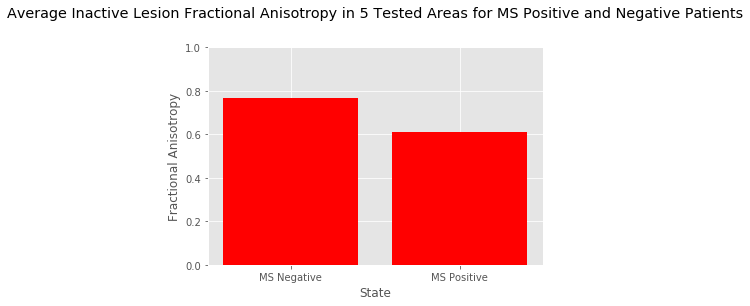

In [97]:
#Comparisson in Fractional Anisotropy of patients which tested positive for MS against patients which tested negative
#Measurments in this data representation are from unactive lesions(Older Damage)
#Patients with NO MS have no damage or very minor damage so data for active and unactive lesions are equivalent
MS_AVG_POSITIVE=0
MS_AVG_NEGATIVE=0
#MS Positive
MS_AVG_POSITIVE+=sum(dataset[0:16999])[8]+sum(dataset[0:16999])[9]+sum(dataset[0:16999])[10]+sum(dataset[0:16999])[11]+sum(dataset[0:16999])[12]
MS_AVG_POSITIVE+=sum(dataset[34999:51999])[8]+sum(dataset[34999:51999])[9]+sum(dataset[34999:51999])[10]+sum(dataset[34999:51999])[11]+sum(dataset[34999:51999])[12]
MS_AVG_POSITIVE+=sum(dataset[69999:86999])[8]+sum(dataset[69999:86999])[9]+sum(dataset[69999:86999])[10]+sum(dataset[69999:86999])[11]+sum(dataset[69999:86999])[12]
MS_AVG_POSITIVE+=sum(dataset[104999:121999])[8]+sum(dataset[104999:121999])[9]+sum(dataset[104999:121999])[10]+sum(dataset[104999:121999])[11]+sum(dataset[104999:121999])[12]
MS_AVG_POSITIVE+=sum(dataset[139999:156999])[8]+sum(dataset[139999:156999])[9]+sum(dataset[139999:156999])[10]+sum(dataset[139999:156999])[11]+sum(dataset[139999:156999])[12]
MS_AVG_POSITIVE+=sum(dataset[174999:191999])[8]+sum(dataset[174999:191999])[9]+sum(dataset[174999:191999])[10]+sum(dataset[174999:191999])[11]+sum(dataset[174999:191999])[12]
MS_AVG_POSITIVE/=510000

#MS Negative
MS_AVG_NEGATIVE+=sum(dataset[16999:34999])[3]+sum(dataset[16999:34999])[4]+sum(dataset[16999:34999])[5]+sum(dataset[16999:34999])[6]+sum(dataset[16999:34999])[7]
MS_AVG_NEGATIVE+=sum(dataset[51999:69999])[3]+sum(dataset[51999:69999])[4]+sum(dataset[51999:69999])[5]+sum(dataset[51999:69999])[6]+sum(dataset[51999:69999])[7]
MS_AVG_NEGATIVE+=sum(dataset[86999:104999])[3]+sum(dataset[86999:104999])[4]+sum(dataset[86999:104999])[5]+sum(dataset[86999:104999])[6]+sum(dataset[86999:104999])[7]
MS_AVG_NEGATIVE+=sum(dataset[121999:139000])[3]+sum(dataset[121999:139000])[4]+sum(dataset[121999:139000])[5]+sum(dataset[121999:139000])[6]+sum(dataset[121999:139000])[7]
MS_AVG_NEGATIVE+=sum(dataset[156999:174999])[3]+sum(dataset[156999:174999])[4]+sum(dataset[156999:174999])[5]+sum(dataset[156999:174999])[6]+sum(dataset[156999:174999])[7]
MS_AVG_NEGATIVE+=sum(dataset[191999:209999])[3]+sum(dataset[191999:209999])[4]+sum(dataset[191999:209999])[5]+sum(dataset[191999:209999])[6]+sum(dataset[191999:209999])[7]
MS_AVG_NEGATIVE/=540000


x1 = ['MS Negative', 'MS Positive', ]
y1 = [MS_AVG_NEGATIVE, MS_AVG_POSITIVE]
#FA is measured between 0 - 1
plt.ylim(0, 1)
x_pos = [i for i, _ in enumerate(x1)]

plt.bar(x_pos, y1, color='red')
plt.xlabel("State")
plt.ylabel("Fractional Anisotropy")

plt.title("Average Inactive Lesion Fractional Anisotropy in 5 Tested Areas for MS Positive and Negative Patients", pad=30)


plt.xticks(x_pos, x1)

plt.show()

<i>A comparisson between the two graphs above displays patients with MS had a lower FA in unactive lesions when compared to Active Lestions. This is primarly due to the longevity of axonal damage that unactive lesions experience relative to active lesions. </i>

<b>Fractional Anisotropy in Age Cohorts</b>

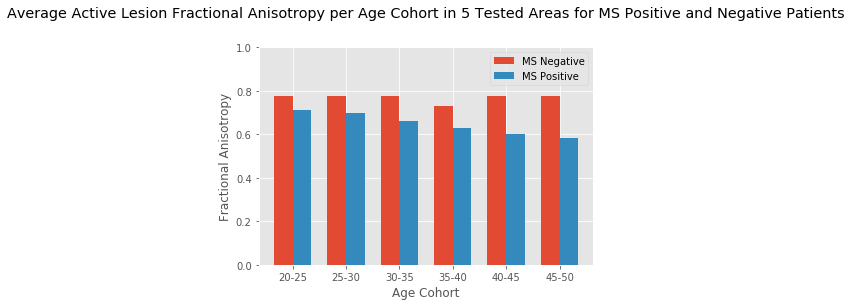

In [98]:
age20_25=[]
age25_30=[]
age30_35=[]
age35_40=[]
age40_45=[]
age45_50=[]
#MS Positive
age20_25.append(sum(dataset[0:16999])[3]+sum(dataset[0:16999])[4]+sum(dataset[0:16999])[5]+sum(dataset[0:16999])[6]+sum(dataset[0:16999])[7])
age25_30.append(sum(dataset[34999:51999])[3]+sum(dataset[34999:51999])[4]+sum(dataset[34999:51999])[5]+sum(dataset[34999:51999])[6]+sum(dataset[34999:51999])[7])
age30_35.append(sum(dataset[69999:86999])[3]+sum(dataset[69999:86999])[4]+sum(dataset[69999:86999])[5]+sum(dataset[69999:86999])[6]+sum(dataset[69999:86999])[7])
age35_40.append(sum(dataset[104999:121999])[3]+sum(dataset[104999:121999])[4]+sum(dataset[104999:121999])[5]+sum(dataset[104999:121999])[6]+sum(dataset[104999:121999])[7])
age40_45.append(sum(dataset[139999:156999])[3]+sum(dataset[139999:156999])[4]+sum(dataset[139999:156999])[5]+sum(dataset[139999:156999])[6]+sum(dataset[139999:156999])[7])
age45_50.append(sum(dataset[174999:191999])[3]+sum(dataset[174999:191999])[4]+sum(dataset[174999:191999])[5]+sum(dataset[174999:191999])[6]+sum(dataset[174999:191999])[7])


#MS Negative
age20_25.append(sum(dataset[16999:34999])[3]+sum(dataset[16999:34999])[4]+sum(dataset[16999:34999])[5]+sum(dataset[16999:34999])[6]+sum(dataset[16999:34999])[7])
age25_30.append(sum(dataset[51999:69999])[3]+sum(dataset[51999:69999])[4]+sum(dataset[51999:69999])[5]+sum(dataset[51999:69999])[6]+sum(dataset[51999:69999])[7])
age30_35.append(sum(dataset[86999:104999])[3]+sum(dataset[86999:104999])[4]+sum(dataset[86999:104999])[5]+sum(dataset[86999:104999])[6]+sum(dataset[86999:104999])[7])
age35_40.append(sum(dataset[121999:139000])[3]+sum(dataset[121999:139000])[4]+sum(dataset[121999:139000])[5]+sum(dataset[121999:139000])[6]+sum(dataset[121999:139000])[7])
age40_45.append(sum(dataset[156999:174999])[3]+sum(dataset[156999:174999])[4]+sum(dataset[156999:174999])[5]+sum(dataset[156999:174999])[6]+sum(dataset[156999:174999])[7])
age45_50.append(sum(dataset[191999:209999])[3]+sum(dataset[191999:209999])[4]+sum(dataset[191999:209999])[5]+sum(dataset[191999:209999])[6]+sum(dataset[191999:209999])[7])

N = 6
ms_pos = (age20_25[0]/85000, age25_30[0]/85000, age30_35[0]/85000, age35_40[0]/85000, age40_45[0]/85000, age45_50[0]/85000)
ms_neg = (age20_25[1]/90000, age25_30[1]/90000, age30_35[1]/90000, age35_40[1]/90000, age40_45[1]/90000, age45_50[1]/90000)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Fractional Anisotropy')
plt.xlabel('Age Cohort')
plt.title('Average Active Lesion Fractional Anisotropy per Age Cohort in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

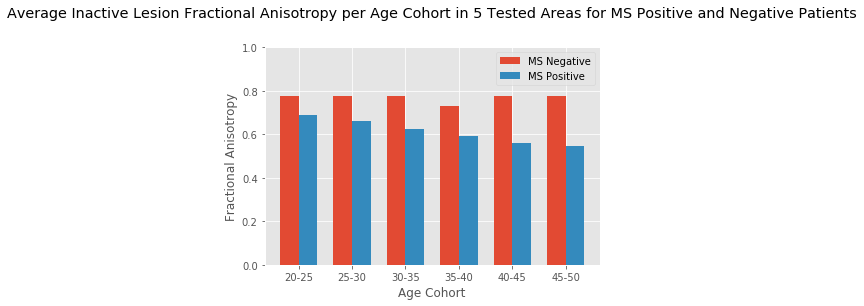

In [99]:
age20_25=[]
age25_30=[]
age30_35=[]
age35_40=[]
age40_45=[]
age45_50=[]
#MS Positive
age20_25.append(sum(dataset[0:16999])[8]+sum(dataset[0:16999])[9]+sum(dataset[0:16999])[10]+sum(dataset[0:16999])[6]+sum(dataset[0:16999])[7])
age25_30.append(sum(dataset[34999:51999])[8]+sum(dataset[34999:51999])[9]+sum(dataset[34999:51999])[10]+sum(dataset[34999:51999])[11]+sum(dataset[34999:51999])[12])
age30_35.append(sum(dataset[69999:86999])[8]+sum(dataset[69999:86999])[9]+sum(dataset[69999:86999])[10]+sum(dataset[69999:86999])[11]+sum(dataset[69999:86999])[12])
age35_40.append(sum(dataset[104999:121999])[8]+sum(dataset[104999:121999])[9]+sum(dataset[104999:121999])[10]+sum(dataset[104999:121999])[11]+sum(dataset[104999:121999])[12])
age40_45.append(sum(dataset[139999:156999])[8]+sum(dataset[139999:156999])[9]+sum(dataset[139999:156999])[10]+sum(dataset[139999:156999])[11]+sum(dataset[139999:156999])[12])
age45_50.append(sum(dataset[174999:191999])[8]+sum(dataset[174999:191999])[9]+sum(dataset[174999:191999])[10]+sum(dataset[174999:191999])[11]+sum(dataset[174999:191999])[12])


#MS Negative
age20_25.append(sum(dataset[16999:34999])[3]+sum(dataset[16999:34999])[4]+sum(dataset[16999:34999])[5]+sum(dataset[16999:34999])[6]+sum(dataset[16999:34999])[7])
age25_30.append(sum(dataset[51999:69999])[3]+sum(dataset[51999:69999])[4]+sum(dataset[51999:69999])[5]+sum(dataset[51999:69999])[6]+sum(dataset[51999:69999])[7])
age30_35.append(sum(dataset[86999:104999])[3]+sum(dataset[86999:104999])[4]+sum(dataset[86999:104999])[5]+sum(dataset[86999:104999])[6]+sum(dataset[86999:104999])[7])
age35_40.append(sum(dataset[121999:139000])[3]+sum(dataset[121999:139000])[4]+sum(dataset[121999:139000])[5]+sum(dataset[121999:139000])[6]+sum(dataset[121999:139000])[7])
age40_45.append(sum(dataset[156999:174999])[3]+sum(dataset[156999:174999])[4]+sum(dataset[156999:174999])[5]+sum(dataset[156999:174999])[6]+sum(dataset[156999:174999])[7])
age45_50.append(sum(dataset[191999:209999])[3]+sum(dataset[191999:209999])[4]+sum(dataset[191999:209999])[5]+sum(dataset[191999:209999])[6]+sum(dataset[191999:209999])[7])

N = 6
ms_pos = (age20_25[0]/85000, age25_30[0]/85000, age30_35[0]/85000, age35_40[0]/85000, age40_45[0]/85000, age45_50[0]/85000)
ms_neg = (age20_25[1]/90000, age25_30[1]/90000, age30_35[1]/90000, age35_40[1]/90000, age40_45[1]/90000, age45_50[1]/90000)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Fractional Anisotropy')
plt.xlabel('Age Cohort')
plt.title('Average Inactive Lesion Fractional Anisotropy per Age Cohort in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('20-25', '25-30', '30-35', '35-40', '40-45', '45-50'))
plt.legend(loc='best')
plt.show()

<b>Fractional Anisotropy in 5 Areas</b>

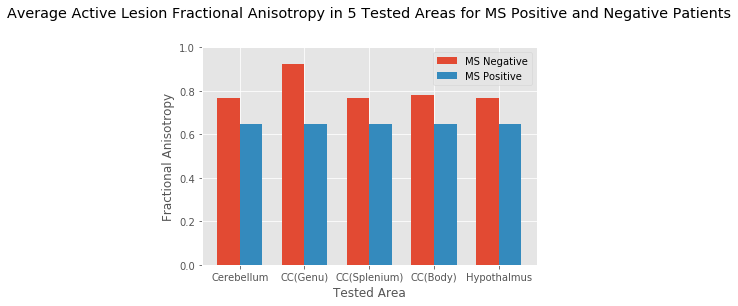

In [100]:
Cerebellum=[]
CC_Genu=[]
CC_Splenium=[]
CC_Body=[]
Hypothalamus=[]

Cerebellum.append((sum(dataset[0:16999])[3]+sum(dataset[34999:51999])[3]+sum(dataset[69999:86999])[3]+sum(dataset[104999:121999])[3]+sum(dataset[139999:156999])[3]+sum(dataset[174999:191999])[3])/102000)
CC_Genu.append((sum(dataset[0:16999])[4]+sum(dataset[34999:51999])[4]+sum(dataset[69999:86999])[4]+sum(dataset[104999:121999])[4]+sum(dataset[139999:156999])[4]+sum(dataset[174999:191999])[4])/102000)
CC_Splenium.append((sum(dataset[0:16999])[5]+sum(dataset[34999:51999])[5]+sum(dataset[69999:86999])[5]+sum(dataset[104999:121999])[5]+sum(dataset[139999:156999])[5]+sum(dataset[174999:191999])[5])/102000)
CC_Body.append((sum(dataset[0:16999])[6]+sum(dataset[34999:51999])[6]+sum(dataset[69999:86999])[6]+sum(dataset[104999:121999])[6]+sum(dataset[139999:156999])[6]+sum(dataset[174999:191999])[6])/102000)
Hypothalamus.append((sum(dataset[0:16999])[7]+sum(dataset[34999:51999])[7]+sum(dataset[69999:86999])[7]+sum(dataset[104999:121999])[7]+sum(dataset[139999:156999])[7]+sum(dataset[174999:191999])[7])/102000)




Cerebellum.append((sum(dataset[16999:34999])[3]+sum(dataset[51999:69999])[3]+sum(dataset[86999:104999])[3]+sum(dataset[121999:139000])[3]+sum(dataset[156999:174999])[3]+sum(dataset[191999:209999])[3])/108000)
CC_Genu.append((sum(dataset[16999:34999])[4]+sum(dataset[51999:69999])[4]+sum(dataset[86999:104999])[4]+sum(dataset[121999:139000])[4]+sum(dataset[156999:174999])[4]+sum(dataset[191999:209999])[4])/90000)
CC_Splenium.append((sum(dataset[16999:34999])[5]+sum(dataset[51999:69999])[5]+sum(dataset[86999:104999])[5]+sum(dataset[121999:139000])[5]+sum(dataset[156999:174999])[5]+sum(dataset[191999:209999])[5])/108000)
CC_Body.append((sum(dataset[16999:34999])[6]+sum(dataset[51999:69999])[6]+sum(dataset[86999:104999])[6]+sum(dataset[121999:139000])[6]+sum(dataset[156999:174999])[6]+sum(dataset[191999:209999])[6])/106000)
Hypothalamus.append((sum(dataset[16999:34999])[7]+sum(dataset[51999:69999])[7]+sum(dataset[86999:104999])[7]+sum(dataset[121999:139000])[7]+sum(dataset[156999:174999])[7]+sum(dataset[191999:209999])[7])/108000)


N = 5
ms_pos = (Cerebellum[0], CC_Genu[0], CC_Splenium[0], CC_Body[0], Hypothalamus[0])
ms_neg = (Cerebellum[1], CC_Genu[1], CC_Splenium[1], CC_Body[1], Hypothalamus[1])
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Fractional Anisotropy')
plt.xlabel('Tested Area')
plt.title('Average Active Lesion Fractional Anisotropy in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('Cerebellum', 'CC(Genu)', 'CC(Splenium)', 'CC(Body)', 'Hypothalmus'))
plt.legend(loc='best')
plt.show()

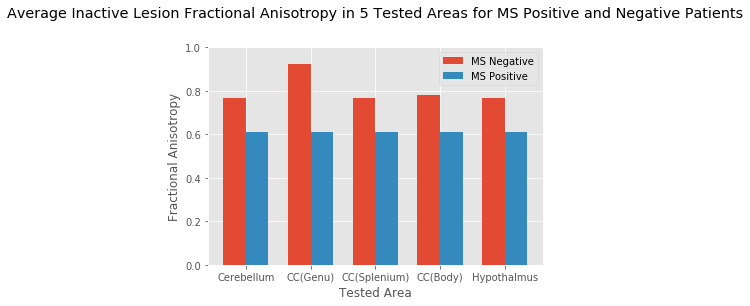

In [103]:
Cerebellum=[]
CC_Genu=[]
CC_Splenium=[]
CC_Body=[]
Hypothalamus=[]

Cerebellum.append((sum(dataset[0:16999])[8]+sum(dataset[34999:51999])[8]+sum(dataset[69999:86999])[8]+sum(dataset[104999:121999])[8]+sum(dataset[139999:156999])[8]+sum(dataset[174999:191999])[8])/102000)
CC_Genu.append((sum(dataset[0:16999])[9]+sum(dataset[34999:51999])[9]+sum(dataset[69999:86999])[9]+sum(dataset[104999:121999])[9]+sum(dataset[139999:156999])[9]+sum(dataset[174999:191999])[9])/102000)
CC_Splenium.append((sum(dataset[0:16999])[10]+sum(dataset[34999:51999])[10]+sum(dataset[69999:86999])[10]+sum(dataset[104999:121999])[10]+sum(dataset[139999:156999])[10]+sum(dataset[174999:191999])[10])/102000)
CC_Body.append((sum(dataset[0:16999])[11]+sum(dataset[34999:51999])[11]+sum(dataset[69999:86999])[11]+sum(dataset[104999:121999])[11]+sum(dataset[139999:156999])[11]+sum(dataset[174999:191999])[11])/102000)
Hypothalamus.append((sum(dataset[0:16999])[12]+sum(dataset[34999:51999])[12]+sum(dataset[69999:86999])[12]+sum(dataset[104999:121999])[12]+sum(dataset[139999:156999])[12]+sum(dataset[174999:191999])[12])/102000)




Cerebellum.append((sum(dataset[16999:34999])[3]+sum(dataset[51999:69999])[3]+sum(dataset[86999:104999])[3]+sum(dataset[121999:139000])[3]+sum(dataset[156999:174999])[3]+sum(dataset[191999:209999])[3])/108000)
CC_Genu.append((sum(dataset[16999:34999])[4]+sum(dataset[51999:69999])[4]+sum(dataset[86999:104999])[4]+sum(dataset[121999:139000])[4]+sum(dataset[156999:174999])[4]+sum(dataset[191999:209999])[4])/90000)
CC_Splenium.append((sum(dataset[16999:34999])[5]+sum(dataset[51999:69999])[5]+sum(dataset[86999:104999])[5]+sum(dataset[121999:139000])[5]+sum(dataset[156999:174999])[5]+sum(dataset[191999:209999])[5])/108000)
CC_Body.append((sum(dataset[16999:34999])[6]+sum(dataset[51999:69999])[6]+sum(dataset[86999:104999])[6]+sum(dataset[121999:139000])[6]+sum(dataset[156999:174999])[6]+sum(dataset[191999:209999])[6])/106000)
Hypothalamus.append((sum(dataset[16999:34999])[7]+sum(dataset[51999:69999])[7]+sum(dataset[86999:104999])[7]+sum(dataset[121999:139000])[7]+sum(dataset[156999:174999])[7]+sum(dataset[191999:209999])[7])/108000)


N = 5
ms_pos = (Cerebellum[0], CC_Genu[0], CC_Splenium[0], CC_Body[0], Hypothalamus[0])
ms_neg = (Cerebellum[1], CC_Genu[1], CC_Splenium[1], CC_Body[1], Hypothalamus[1])
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ms_neg, width, label='MS Negative')
plt.bar(ind + width, ms_pos, width, label='MS Positive')
plt.ylim(0, 1)
plt.ylabel('Fractional Anisotropy')
plt.xlabel('Tested Area')
plt.title('Average Inactive Lesion Fractional Anisotropy in 5 Tested Areas for MS Positive and Negative Patients', pad=30)

plt.xticks(ind + width / 2, ('Cerebellum', 'CC(Genu)', 'CC(Splenium)', 'CC(Body)', 'Hypothalmus'))
plt.legend(loc='best')
plt.show()

<b>Body Mass Index and Expanded Disability Status Scale (EDSS) Relationship</b>

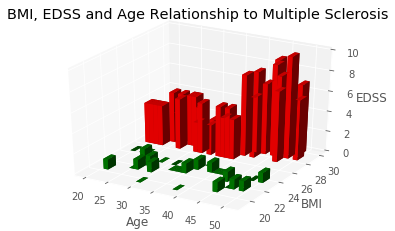

In [108]:
%matplotlib inline

#For each age group(increment: +=1) the average BMI and EDSS of all the patients with MS and all the Healthy Patients were graphed
#Age
xpos=[20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50]
#BMI
ypos=[24, 26, 20, 26, 24, 26, 24, 26, 23, 27, 21, 27, 21, 27, 22, 26, 23, 27, 21, 27, 19, 27, 23, 26, 22, 26, 22, 27, 22, 26, 22, 27, 23, 26, 24, 26, 19, 26, 23, 26, 23, 27, 23, 28, 23, 27, 22, 28, 22, 29, 20, 28, 21, 28, 21, 27, 23, 28, 21, 29, 23, 28]
#EDS
dz=[0, 4, 1, 4, 0, 4, 0, 4, 1, 5, 0, 3, 1, 5, 1, 5, 0, 5, 1, 5, 0, 4, 0, 3, 0, 5, 0, 3, 0, 3, 1, 3, 1, 5, 0, 4, 0, 5, 1, 4, 0, 8, 0, 8, 0, 6, 0, 7, 1, 9, 1, 9, 0, 8, 1, 7, 0, 10, 1, 7, 1, 6]

zpos=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#indicating every second element is MS Positive(Red) and every other patient is Healthy(Green) 
color=['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red']
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.set_facecolor('xkcd:white')
#ax1.text2D(0.30, 0.95, "BMI and EDSS Relationship to MS", transform=ax1.transAxes)
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')
ax1.set_zlabel('EDSS')
ax1.set_title('BMI, EDSS and Age Relationship to Multiple Sclerosis')
num_elements = len(xpos)
dx = np.ones(62)
dy = np.ones(62)



ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color)
plt.show()


## Multiple Sclerosis Model Architecture

In [27]:
#Data Headings
df = pd.read_csv("msdata.csv")
dataset=df.values
df.head(0)

,Age,Gender,BMI,FA Cerebellum AL,FA CC(Genu) AL,FA CC(Splenium) AL,FA CC(Body) AL,FA Hypothalamus AL,FA Cerebellum UL,FA CC(Genu) UL,...,MD CC(Splenium) AL,MD CC(Body) AL,MD Hypothalamus AL,MD Cerebellum UL,MD CC(Genu) UL,MD CC(Splenium) UL,MD CC(Body) UL,MD Hypothalamus UL,EDSS SCALE,MS_Status


<b>Independent Variables</b>

In [28]:
independent_var=dataset[:, 0:24]
#Data representation of first 5 patients
for patient in independent_var[0:5]:
    print(patient)

[21.     0.    24.24   0.709  0.704  0.7    0.701  0.703  0.683  0.65
  0.681  0.638  0.651  0.374  0.373  0.373  0.379  0.374  0.417  0.411
  0.388  0.391  0.376  6.   ]
[19.     1.    26.98   0.701  0.719  0.711  0.705  0.711  0.67   0.674
  0.675  0.657  0.647  0.372  0.374  0.377  0.373  0.379  0.393  0.429
  0.446  0.395  0.416  6.   ]
[26.     1.    24.86   0.706  0.71   0.714  0.707  0.701  0.705  0.664
  0.664  0.672  0.659  0.378  0.377  0.375  0.374  0.373  0.442  0.392
  0.45   0.423  0.425  5.   ]
[25.     1.    26.54   0.71   0.706  0.715  0.709  0.708  0.683  0.643
  0.659  0.666  0.686  0.37   0.378  0.37   0.377  0.371  0.409  0.447
  0.386  0.449  0.432  6.   ]
[25.     0.    25.02   0.716  0.715  0.706  0.712  0.714  0.646  0.7
  0.667  0.704  0.694  0.377  0.372  0.37   0.379  0.374  0.433  0.373
  0.429  0.421  0.42   5.   ]


<b>Dependent Variable</b>

In [29]:
#Determining if the patient has Multiple Sclerosis
dependent_var=df.MS_Status
for patient in dependent_var[0:5]:
    print(patient)

#1 indicated positive for MS
#0 indicates negative for MS

1
1
1
1
1


<b>Normalizing Data</b>

In [30]:
#using sklearn library to normalize dependent variable data(Mainly BMI, Age and EDSS as MD AND FA are between 0 and 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(independent_var)
for normalized_patient_data in x_scale[0:5]:
    print(normalized_patient_data)
    

[0.0625     0.         0.58452138 0.58636364 0.56363636 0.54545455
 0.55       0.55909091 0.60338983 0.49152542 0.59661017 0.45084746
 0.49491525 0.41111111 0.40555556 0.40555556 0.43888889 0.41111111
 0.45882353 0.43529412 0.34509804 0.35686275 0.29803922 0.66666667]
[0.         1.         0.86354379 0.55       0.63181818 0.59545455
 0.56818182 0.59545455 0.55932203 0.57288136 0.57627119 0.51525424
 0.48135593 0.4        0.41111111 0.42777778 0.40555556 0.43888889
 0.36470588 0.50588235 0.57254902 0.37254902 0.45490196 0.66666667]
[0.21875    1.         0.64765784 0.57272727 0.59090909 0.60909091
 0.57727273 0.55       0.6779661  0.53898305 0.53898305 0.56610169
 0.5220339  0.43333333 0.42777778 0.41666667 0.41111111 0.40555556
 0.55686275 0.36078431 0.58823529 0.48235294 0.49019608 0.55555556]
[0.1875     1.         0.81873727 0.59090909 0.57272727 0.61363636
 0.58636364 0.58181818 0.60338983 0.46779661 0.5220339  0.54576271
 0.61355932 0.38888889 0.43333333 0.38888889 0.42777778 0.3

<b><br>Splitting Training, Validation and Testing Data</b>

In [31]:
#Split the data into 80% training and 20% (testing (10%) and validation (10%))-common ratio
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, dependent_var, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

<br><b>Initial Model Architecture</b>

In [110]:
# Rule of Topology to determine number of nodes and layers
model = keras.models.Sequential()
model.add(keras.layers.Dense(17, activation='relu', input_shape=(24,)))
model.add(keras.layers.Dense(17, activation='relu'))
#output layer-outputs value between 0 and 1 
#1 indicates positive for MS and 0 indicates negative for MS
model.add(keras.layers.Dense(1))

<br><b>Model Summary</b>

In [33]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                425       
_________________________________________________________________
dense_1 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 18        
Total params: 749
Trainable params: 749
Non-trainable params: 0
_________________________________________________________________


<b>Compiling Model</b>

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Training and Validating Multiple Sclerosis Neural Network

<b>Fitting Model</b>

In [35]:
history=model.fit(x_train, y_train, epochs=10, shuffle=True, batch_size=3000, validation_data=(x_val, y_val))

Train on 168000 samples, validate on 21000 samples
Epoch 1/10
168000/168000 [==============================] - 1s 9us/sample - loss: 0.3806 - acc: 0.5698 - val_loss: 0.1349 - val_acc: 0.9145
Epoch 2/10
168000/168000 [==============================] - 1s 5us/sample - loss: 0.0919 - acc: 0.9152 - val_loss: 0.0760 - val_acc: 0.9136
Epoch 3/10
168000/168000 [==============================] - 0s 3us/sample - loss: 0.0693 - acc: 0.9149 - val_loss: 0.0643 - val_acc: 0.9146
Epoch 4/10
168000/168000 [==============================] - 0s 3us/sample - loss: 0.0584 - acc: 0.9183 - val_loss: 0.0547 - val_acc: 0.9194
Epoch 5/10
168000/168000 [==============================] - 0s 2us/sample - loss: 0.0507 - acc: 0.9295 - val_loss: 0.0483 - val_acc: 0.9342
Epoch 6/10
168000/168000 [==============================] - 0s 2us/sample - loss: 0.0458 - acc: 0.9436 - val_loss: 0.0443 - val_acc: 0.9480
Epoch 7/10
168000/168000 [==============================] - 1s 6us/sample - loss: 0.0421 - acc: 0.9542 - val_

## Training and Validation Results

<b>Model Accuracy</b>

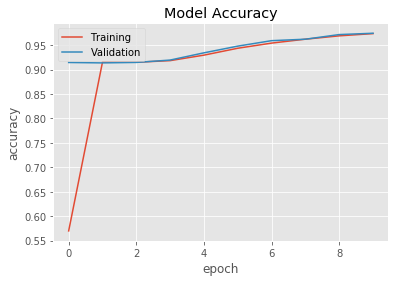

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

<b>Model Loss</b>

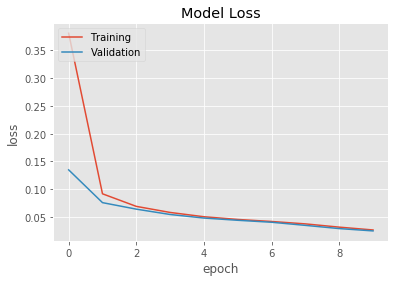

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

<i>The following graph representations display the model is neither overfitting or underfitting. However, the large staggers indicate that the batch size needs to decrease. It appears that the following model has not reached its full potential. In the optimized model a call back function will be added along with an increase in epochs and nodes.</i>

## Optimized Model Architecture

<b>Optimized Model Architecture</b>

In [38]:
model = keras.models.Sequential()
#Increase in Nodes(+2)
model.add(keras.layers.Dense(19, activation='relu', input_shape=(24,)))
model.add(keras.layers.Dense(19, activation='relu'))
#output layer-outputs value between 0 and 1 
#1 indicates positive for MS and 0 indicates negative for MS i
model.add(keras.layers.Dense(1))

<b>Optimized Model Summary</b>

In [39]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 19)                475       
_________________________________________________________________
dense_4 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 20        
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


<b>Callback Function</b>

In [40]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=80, monitor='val_acc')]

<b>Compiling Optimized Model </b>

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Training and Validating Optimized Multiple Sclerosis Neural Network

In [42]:
#Split the data into 80% training and 20% (testing (10%) and validation (10%))-common ratio
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, dependent_var, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

<b>Fitting Model</b>

In [43]:
history=model.fit(x_train, y_train, epochs=500, shuffle=True, batch_size=400, validation_data=(x_val, y_val), callbacks=my_callbacks)

Train on 168000 samples, validate on 21000 samples
Epoch 1/500
168000/168000 [==============================] - 6s 36us/sample - loss: 0.0645 - acc: 0.9152 - val_loss: 0.0351 - val_acc: 0.9626
Epoch 2/500
168000/168000 [==============================] - 2s 13us/sample - loss: 0.0272 - acc: 0.9722 - val_loss: 0.0210 - val_acc: 0.9776
Epoch 3/500
168000/168000 [==============================] - 2s 11us/sample - loss: 0.0185 - acc: 0.9798 - val_loss: 0.0166 - val_acc: 0.9809
Epoch 4/500
168000/168000 [==============================] - 2s 10us/sample - loss: 0.0158 - acc: 0.9819 - val_loss: 0.0147 - val_acc: 0.9820
Epoch 5/500
168000/168000 [==============================] - 2s 9us/sample - loss: 0.0149 - acc: 0.9823 - val_loss: 0.0141 - val_acc: 0.9822
Epoch 6/500
168000/168000 [==============================] - 3s 19us/sample - loss: 0.0143 - acc: 0.9826 - val_loss: 0.0135 - val_acc: 0.9831
Epoch 7/500
168000/168000 [==============================] - 3s 17us/sample - loss: 0.0140 - acc: 

<h3><font color=BLUE>Optimized Training and Validation Results</font></h3> 

<b>Optimized Model Accuracy</b>

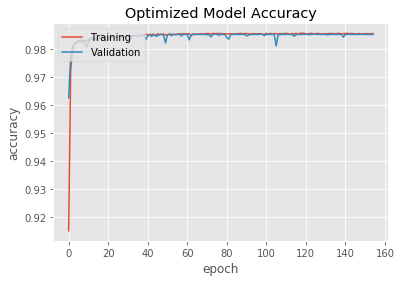

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Optimized Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

<b>Optimized Model Loss</b>

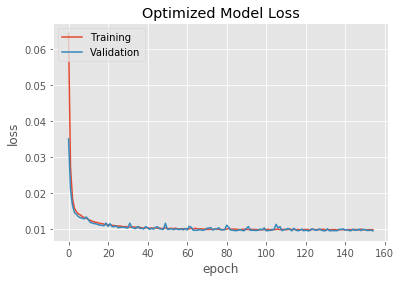

In [77]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Optimized Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

## Testing Neural Network

In [81]:
model.save('ms-model.h5')
prediction=model.predict(x_test)
#Only assumes person has MS if prediction is 97% sure
prediction=[1 if y>=0.97 else 0 for y in prediction]
accuracy=0
for i in range(len(prediction)):
    if(prediction[i]==list(y_test)[i]):
        accuracy+=1
        
print((accuracy/len(prediction))*100)

97.41428571428571


<b>Final Model Accuracy: 97.41%</b>

<b>Comparisson of Efficacy</b>

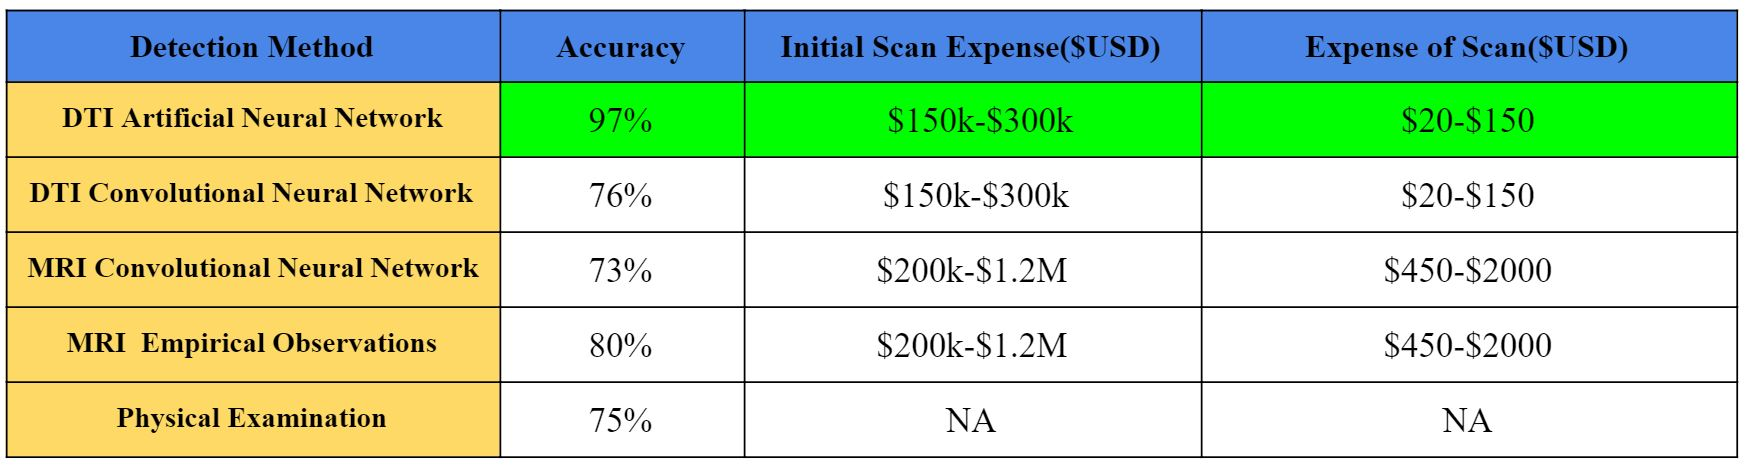

In [83]:
Image(filename='efficacy.jpg') 

<i>Above is a chart displaying a clear comparison between all of the most used detection methods for MS. Highlighted in green are the values obtained within this study. When examining the results it is clearly present that the DTI ANN clearly outpreforms all the other detection methods. Data for other detection methods were obtained through past research journals.</i>

## Final Results and Future Improvments

<b>Rsearch Paper Summary</b>

<p style='text-align: justify;'>  Accessible and accurate diagnosis is the first step in providing treatment to a disease. Although the cause of multiple sclerosis is still unknown, its demyelinating effect can be used to determine if a patient has the disorder. Up until recently, this has been difficult to achieve due to the difficulty of detecting the disease with current methodologies. However, through this study it is evident that DTI scans and the Multiple Sclerosis ANN model could be a huge leap forward in being able to detect myelin damage in nerve cells. This model can be used as a faster, more effective and more accurate method in detecting demyelination and the degree of demyelination as well. As Multiple Sclerosis is a progressive disease it is crucial to detect it at an early stage and this paper is a clear representation of early detection at 97.41% accuracy.</p>